-Prepare solution to build ticketing system there by using json file as your primary datasource (Text corpus with other metadata in it). 
Step 1: Group data into five categories namely Banking services, loans, Fraudalent reporting, Card, others.
Step 2: From step 1 create labeled dataset and utilize it to train supervised model like logistic regression, decision tree or random forest.


Above excercise should follow these steps -
Load Data
Text Preprocessing
EDA
Feature Extraction
Topic Modelling (Unsupervised)
Model building using Supervised learning
Model Training and evaluation
Inference


# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import re, nltk, spacy, string
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tejas_sonawane\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
import json

# Loading Data

In [3]:
f=open('Client_data.json')

In [4]:
AllData=json.load(f)

In [5]:
dataset=pd.json_normalize(AllData)
dataset.head(5)

,_index,_type,_id,_score,_source.tags,_source.zip_code,_source.complaint_id,_source.issue,_source.date_received,_source.state,...,_source.company_response,_source.company,_source.submitted_via,_source.date_sent_to_company,_source.company_public_response,_source.sub_product,_source.timely,_source.complaint_what_happened,_source.sub_issue,_source.consumer_consent_provided
0,complaint-public-v2,complaint,3211475,0.0,None,90301,3211475,Attempts to collect debt not owed,2019-04-13T12:00:00-05:00,CA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-13T12:00:00-05:00,None,Credit card debt,Yes,,Debt is not yours,Consent not provided
1,complaint-public-v2,complaint,3229299,0.0,Servicemember,319XX,3229299,Written notification about debt,2019-05-01T12:00:00-05:00,GA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-05-01T12:00:00-05:00,None,Credit card debt,Yes,Good morning my name is XXXX XXXX and I apprec...,Didn't receive enough information to verify debt,Consent provided
2,complaint-public-v2,complaint,3199379,0.0,None,77069,3199379,"Other features, terms, or problems",2019-04-02T12:00:00-05:00,TX,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-02T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Problem with rewards from credit card,Consent provided
3,complaint-public-v2,complaint,2673060,0.0,None,48066,2673060,Trouble during payment process,2017-09-13T12:00:00-05:00,MI,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2017-09-14T12:00:00-05:00,None,Conventional home mortgage,Yes,,None,Consent not provided
4,complaint-public-v2,complaint,3203545,0.0,None,10473,3203545,Fees or interest,2019-04-05T12:00:00-05:00,NY,...,Closed with explanation,JPMORGAN CHASE & CO.,Referral,2019-04-05T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,,Charged too much interest,N/A


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78313 entries, 0 to 78312
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   _index                             78313 non-null  object 
 1   _type                              78313 non-null  object 
 2   _id                                78313 non-null  object 
 3   _score                             78313 non-null  float64
 4   _source.tags                       10900 non-null  object 
 5   _source.zip_code                   71556 non-null  object 
 6   _source.complaint_id               78313 non-null  object 
 7   _source.issue                      78313 non-null  object 
 8   _source.date_received              78313 non-null  object 
 9   _source.state                      76322 non-null  object 
 10  _source.consumer_disputed          78313 non-null  object 
 11  _source.product                    78313 non-null  obj

In [7]:
dataset['_source.complaint_what_happened'] = dataset['_source.complaint_what_happened'].astype(str)

In [8]:
dataset['_source.product'] = dataset['_source.product'].astype(str)

In [9]:
dataset.columns

Index(['_index', '_type', '_id', '_score', '_source.tags', '_source.zip_code',
       '_source.complaint_id', '_source.issue', '_source.date_received',
       '_source.state', '_source.consumer_disputed', '_source.product',
       '_source.company_response', '_source.company', '_source.submitted_via',
       '_source.date_sent_to_company', '_source.company_public_response',
       '_source.sub_product', '_source.timely',
       '_source.complaint_what_happened', '_source.sub_issue',
       '_source.consumer_consent_provided'],
      dtype='object')

In [10]:
dframe = dataset[['_source.complaint_what_happened', '_source.product']]
dframe.head()

,_source.complaint_what_happened,_source.product
0,,Debt collection
1,Good morning my name is XXXX XXXX and I apprec...,Debt collection
2,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Credit card or prepaid card
3,,Mortgage
4,,Credit card or prepaid card


In [11]:
dframe.isnull().sum()

_source.complaint_what_happened    0
_source.product                    0
dtype: int64

In [12]:
dframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78313 entries, 0 to 78312
Data columns (total 2 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   _source.complaint_what_happened  78313 non-null  object
 1   _source.product                  78313 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


In [13]:
dframe.shape

(78313, 2)

# Text Preprocessing

In [14]:
#Renaming the columns name 
dframe.rename(columns = {'_source.complaint_what_happened':'Complaint_raised', '_source.product':'Source_Product',
                              }, inplace = True)

C:\Users\tejas_sonawane\AppData\Local\Temp\ipykernel_22764\2313333154.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dframe.rename(columns = {'_source.complaint_what_happened':'Complaint_raised', '_source.product':'Source_Product',


In [15]:
dframe.head()

,Complaint_raised,Source_Product
0,,Debt collection
1,Good morning my name is XXXX XXXX and I apprec...,Debt collection
2,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Credit card or prepaid card
3,,Mortgage
4,,Credit card or prepaid card


In [16]:
dframe[dframe.loc[:, 'Complaint_raised'] == ''] = np.nan

C:\Users\tejas_sonawane\AppData\Local\Temp\ipykernel_22764\109302196.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dframe[dframe.loc[:, 'Complaint_raised'] == ''] = np.nan
C:\Users\tejas_sonawane\AppData\Local\Temp\ipykernel_22764\109302196.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dframe[dframe.loc[:, 'Complaint_raised'] == ''] = np.nan


In [17]:
dframe = dframe[~dframe['Complaint_raised'].isnull()]

In [18]:
dframe.shape

(21072, 2)

In [19]:
dframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21072 entries, 1 to 78312
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Complaint_raised  21072 non-null  object
 1   Source_Product    21072 non-null  object
dtypes: object(2)
memory usage: 493.9+ KB


In [20]:
#To check what exactly in complaint section
dframe['Complaint_raised'].unique()

array(['Good morning my name is XXXX XXXX and I appreciate it if you could help me put a stop to Chase Bank cardmember services. \nIn 2018 I wrote to Chase asking for debt verification and what they sent me a statement which is not acceptable. I am asking the bank to validate the debt. Instead I been receiving mail every month from them attempting to collect a debt. \nI have a right to know this information as a consumer. \n\nChase account # XXXX XXXX XXXX XXXX Thanks in advance for your help.',
       'I upgraded my XXXX XXXX card in XX/XX/2018 and was told by the agent who did the upgrade my anniversary date would not change. It turned the agent was giving me the wrong information in order to upgrade the account. XXXX   changed my anniversary date from XX/XX/XXXX to XX/XX/XXXX without my consent! XXXX has the recording of the agent who was misled me.',
       'Chase Card was reported on XX/XX/2019. However, fraudulent application have been submitted my identity without my consent to 

In [21]:
#To check what exactly in product section
dframe['Source_Product'].unique()

array(['Debt collection', 'Credit card or prepaid card',
       'Credit reporting, credit repair services, or other personal consumer reports',
       'Checking or savings account', 'Vehicle loan or lease',
       'Money transfer, virtual currency, or money service', 'Mortgage',
       'Student loan', 'Consumer Loan',
       'Payday loan, title loan, or personal loan',
       'Bank account or service', 'Credit card', 'Credit reporting',
       'Money transfers', 'Prepaid card', 'Other financial service',
       'Payday loan'], dtype=object)

In [22]:
# Lowercasing Complaints raised
dframe['Complaint_raised'] = dframe['Complaint_raised'].str.lower()
dframe.head()

,Complaint_raised,Source_Product
1,good morning my name is xxxx xxxx and i apprec...,Debt collection
2,i upgraded my xxxx xxxx card in xx/xx/2018 and...,Credit card or prepaid card
10,chase card was reported on xx/xx/2019. however...,"Credit reporting, credit repair services, or o..."
11,"on xx/xx/2018, while trying to book a xxxx xx...","Credit reporting, credit repair services, or o..."
14,my grand son give me check for {$1600.00} i de...,Checking or savings account


In [23]:
# Lowercasing Source Products
dframe['Source_Product'] = dframe['Source_Product'].str.lower()
dframe.head()

,Complaint_raised,Source_Product
1,good morning my name is xxxx xxxx and i apprec...,debt collection
2,i upgraded my xxxx xxxx card in xx/xx/2018 and...,credit card or prepaid card
10,chase card was reported on xx/xx/2019. however...,"credit reporting, credit repair services, or o..."
11,"on xx/xx/2018, while trying to book a xxxx xx...","credit reporting, credit repair services, or o..."
14,my grand son give me check for {$1600.00} i de...,checking or savings account


In [24]:
# Removing Punctuations to make data very clear
dframe['Complaint_raised'] = dframe['Complaint_raised'].str.replace('[^A-Za-z0-9]+',' ', regex=True)
dframe.head()

,Complaint_raised,Source_Product
1,good morning my name is xxxx xxxx and i apprec...,debt collection
2,i upgraded my xxxx xxxx card in xx xx 2018 and...,credit card or prepaid card
10,chase card was reported on xx xx 2019 however ...,"credit reporting, credit repair services, or o..."
11,on xx xx 2018 while trying to book a xxxx xxxx...,"credit reporting, credit repair services, or o..."
14,my grand son give me check for 1600 00 i depos...,checking or savings account


In [25]:
stopwords.append('xxxx')
stopwords.append('xx')
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [26]:
# Removing Stopwords
dframe['Complaint_raised'] = dframe['Complaint_raised'].apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in stopwords))
dframe['Source_Product'] = dframe['Source_Product'].apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in stopwords))
dframe.head()

,Complaint_raised,Source_Product
1,good morning name appreciate could help put st...,debt collection
2,upgraded card 2018 told agent upgrade annivers...,credit card prepaid card
10,chase card reported 2019 however fraudulent ap...,"credit reporting, credit repair services, pers..."
11,2018 trying book ticket came across offer 300 ...,"credit reporting, credit repair services, pers..."
14,grand son give check 1600 00 deposit chase acc...,checking savings account


In [27]:
dframe = dframe.sample(5000)

In [28]:
import en_core_web_sm
nlp = en_core_web_sm.load()
nltk.download('wordnet')
def lemmatize_text(text):
    sent = []
    doc = nlp(text)
    for token in doc:
        sent.append(token.lemma_)
    return " ".join(sent)
dframe['lemmatized_Complaint_raised'] = dframe['Complaint_raised'].apply(lemmatize_text)
dframe['lemmatized_Source_Product'] = dframe['Source_Product'].apply(lemmatize_text)
dframe.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\tejas_sonawane\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Complaint_raised,Source_Product,lemmatized_Complaint_raised,lemmatized_Source_Product
12214,using autopay option chase allows pay either f...,credit card,use autopay option chase allow pay either full...,credit card
48087,originally filed complaint chase bank response...,checking savings account,originally file complaint chase bank response ...,check saving account
6493,j p morgan chase bank violation fair credit re...,"credit reporting, credit repair services, pers...",j p morgan chase bank violation fair credit re...,"credit reporting , credit repair service , per..."
75144,repeatedly several years chase bank made unaut...,"credit reporting, credit repair services, pers...",repeatedly several year chase bank make unauth...,"credit reporting , credit repair service , per..."
48091,joint checking account chase bank noticed quic...,checking savings account,joint checking account chase bank notice quick...,check saving account


# Exploratory Data Analysis(EDA)

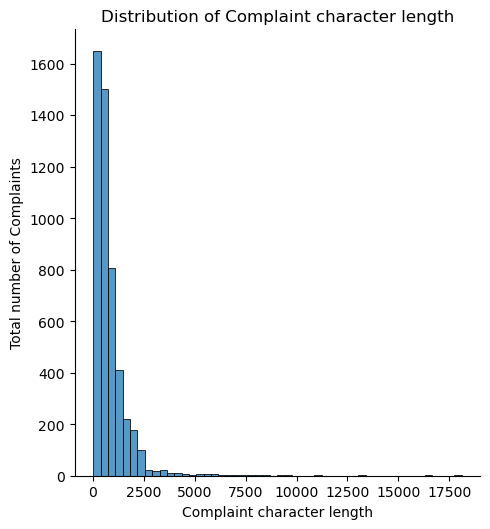

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
ch_len = [len(each_sent) for each_sent in dframe['lemmatized_Complaint_raised']]

sns.displot(ch_len, kind='hist', bins=50)
plt.xlabel("Complaint character length")
plt.ylabel("Total number of Complaints")
plt.title("Distribution of Complaint character length")
plt.show()

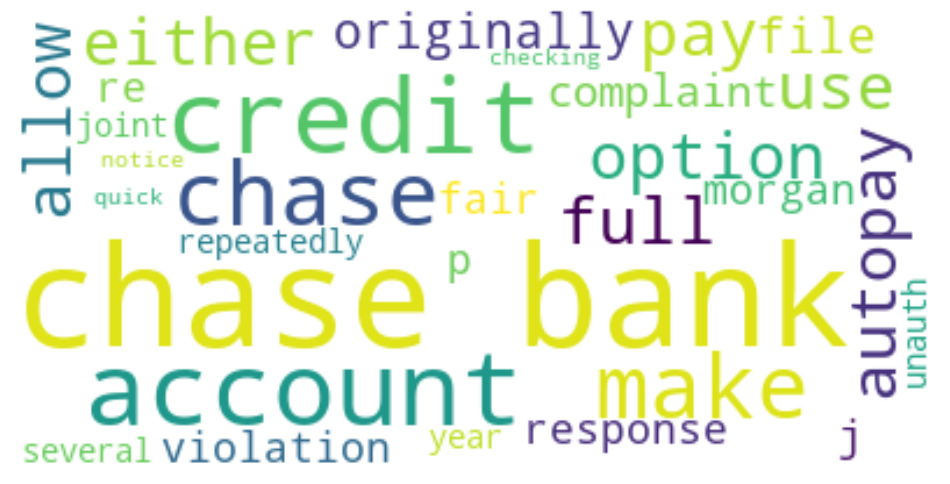

In [30]:
# Wordcloud for complaint
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
wordcloud = WordCloud(max_font_size=60, max_words=30, 
                      background_color="white", random_state=100, 
                      stopwords=stopwords).generate(str(dframe['lemmatized_Complaint_raised']))
plt.figure(figsize=[12,12])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

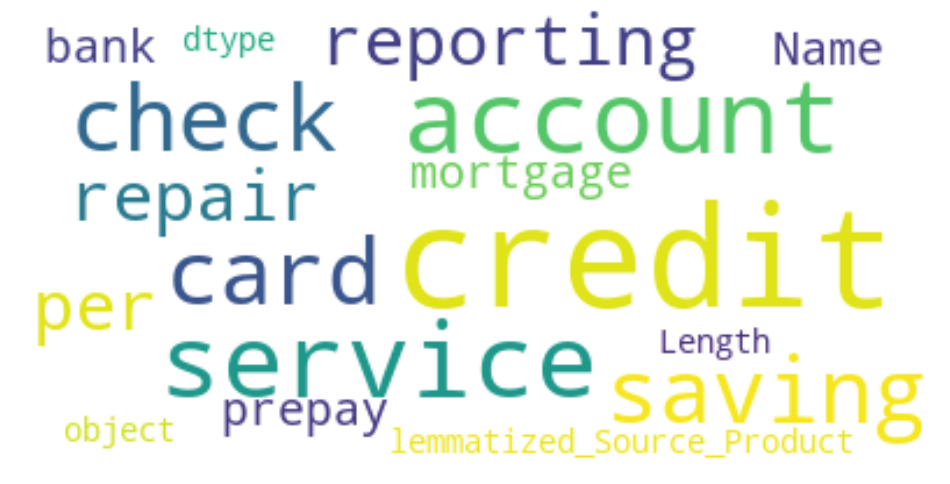

In [31]:
#wordcloud for product
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
wordcloud = WordCloud(max_font_size=60, max_words=30, 
                      background_color="white", random_state=100, 
                      stopwords=stopwords).generate(str(dframe['lemmatized_Source_Product']))
plt.figure(figsize=[12,12])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Feature Extraction

In [32]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [39]:
tfidfvect = TfidfVectorizer(min_df=2, max_df=0.95, stop_words='english')

In [40]:
d = tfidfvect.fit_transform(dframe['lemmatized_Complaint_raised'])

In [41]:
d

<5000x6858 sparse matrix of type '<class 'numpy.float64'>'
	with 293021 stored elements in Compressed Sparse Row format>

# Topic Modelling

In [42]:
from sklearn.decomposition import NMF

In [43]:
#Loading nmf model with 5 components
num_topics = 5
nmf_model = NMF(n_components=num_topics, random_state=40)

In [44]:
nmf_model.fit(d)
len(tfidfvect.get_feature_names())

C:\Users\tejas_sonawane\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
C:\Users\tejas_sonawane\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


6858

In [45]:
U = nmf_model.components_ 

In [46]:
#Print the Top10 words for each of the topics
words = np.array(tfidfvect.get_feature_names())
topic_wordnames = pd.DataFrame(np.zeros((num_topics, 10)), index=[f'Topic {i + 1}' for i in range(num_topics)],
                           columns=[f'Word {i + 1}' for i in range(10)]).astype(str)
for i in range(num_topics):
    ix = U[i].argsort()[::-1][:10]
    topic_wordnames.iloc[i] = words[ix]

topic_wordnames

,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10
Topic 1,account,check,bank,chase,money,deposit,fund,close,open,tell
Topic 2,credit,card,report,inquiry,chase,apply,account,remove,hard,score
Topic 3,loan,mortgage,chase,home,modification,send,letter,time,document,property
Topic 4,charge,00,card,chase,dispute,transaction,fee,purchase,merchant,claim
Topic 5,payment,late,pay,make,balance,month,fee,statement,00,monthly


In [47]:
#Creating the best topic for each complaint in terms of integer value 0,1,2,3 & 4
topic_namesresults = nmf_model.transform(d)

In [48]:
dframe['Topic'] = topic_namesresults.argmax(axis=1)

In [49]:
dframe.head()

,Complaint_raised,Source_Product,lemmatized_Complaint_raised,lemmatized_Source_Product,Topic
12214,using autopay option chase allows pay either f...,credit card,use autopay option chase allow pay either full...,credit card,4
48087,originally filed complaint chase bank response...,checking savings account,originally file complaint chase bank response ...,check saving account,0
6493,j p morgan chase bank violation fair credit re...,"credit reporting, credit repair services, pers...",j p morgan chase bank violation fair credit re...,"credit reporting , credit repair service , per...",1
75144,repeatedly several years chase bank made unaut...,"credit reporting, credit repair services, pers...",repeatedly several year chase bank make unauth...,"credit reporting , credit repair service , per...",1
48091,joint checking account chase bank noticed quic...,checking savings account,joint checking account chase bank notice quick...,check saving account,0


In [50]:
dframe.sort_values('Topic')

,Complaint_raised,Source_Product,lemmatized_Complaint_raised,lemmatized_Source_Product,Topic
32280,called chase bank ask open business account pe...,checking savings account,call chase bank ask open business account pers...,check saving account,0
29453,opened checking account chase weeks ago lured ...,bank account service,open check account chase week ago lure 300 00 ...,bank account service,0
4904,j p morgan chase closed credit card accounts i...,"money transfer, virtual currency, money service",j p morgan chase close credit card account inf...,"money transfer , virtual currency , money service",0
70590,check account chase basic account overdraft au...,bank account service,check account chase basic account overdraft au...,bank account service,0
10349,someone wrote fraudulent check business accoun...,checking savings account,someone write fraudulent check business accoun...,check saving account,0
...,...,...,...,...,...
18400,good afternoon wanted write truth happening se...,credit card prepaid card,good afternoon want write truth happening seem...,credit card prepay card,4
44105,chase lease vehicle payments lease rental paym...,checking savings account,chase lease vehicle payment lease rental payme...,check saving account,4
62005,recently loan payments increased increased nee...,mortgage,recently loan payment increase increased need ...,mortgage,4
19021,sent 6 separate payments checks bank mortgage ...,checking savings account,send 6 separate payment check bank mortgage co...,check saving account,4


In [51]:
#Create the dictionary of Topic names and Topics for actual understanding
Topic_exactnames = { 0:"Bank account services", 1:"Credit card / Prepaid card", 2:"Others",3:"Theft/Dispute reporting", 4:"Mortgages/loans" }
#Replace Topics with Topic Names
dframe['Topic'] = dframe['Topic'].map(Topic_exactnames)

In [52]:
dframe.shape

(5000, 5)

In [53]:
dframe.head()

,Complaint_raised,Source_Product,lemmatized_Complaint_raised,lemmatized_Source_Product,Topic
12214,using autopay option chase allows pay either f...,credit card,use autopay option chase allow pay either full...,credit card,Mortgages/loans
48087,originally filed complaint chase bank response...,checking savings account,originally file complaint chase bank response ...,check saving account,Bank account services
6493,j p morgan chase bank violation fair credit re...,"credit reporting, credit repair services, pers...",j p morgan chase bank violation fair credit re...,"credit reporting , credit repair service , per...",Credit card / Prepaid card
75144,repeatedly several years chase bank made unaut...,"credit reporting, credit repair services, pers...",repeatedly several year chase bank make unauth...,"credit reporting , credit repair service , per...",Credit card / Prepaid card
48091,joint checking account chase bank noticed quic...,checking savings account,joint checking account chase bank notice quick...,check saving account,Bank account services


In [54]:
#Again create the dictionary of Topic names and Topics for traiing the data
Topic_exactnames = { "Bank account services":0, "Credit card / Prepaid card":1, "Others":2,"Theft/Dispute reporting":3, "Mortgages/loans":4 }
#Replace Topics with Topic Names
dframe['Topic'] = dframe['Topic'].map(Topic_exactnames)

In [55]:
train_data = dframe[['Complaint_raised', 'Topic']]

In [56]:
train_data

,Complaint_raised,Topic
12214,using autopay option chase allows pay either f...,4
48087,originally filed complaint chase bank response...,0
6493,j p morgan chase bank violation fair credit re...,1
75144,repeatedly several years chase bank made unaut...,1
48091,joint checking account chase bank noticed quic...,0
...,...,...
11410,account listed credit record sent collections ...,2
25917,credit cards chase least since 3 yrs 7 mos how...,1
8748,chase bank deducted nsf fees late next morning...,0
57643,made large lump sum payment towards mortgage c...,2


In [57]:
# getting the Vector count
vect = CountVectorizer()
X_train_count = vect.fit_transform(train_data['Complaint_raised'])

In [58]:
# Transforming the word vector to tf-idf
tfidf_transformer = TfidfTransformer()
X_train_tfidfvect = tfidf_transformer.fit_transform(X_train_count)

# Logistic Regression(Model training)

In [59]:
# Importing Logistic Regression
from sklearn.linear_model import LogisticRegression

In [60]:
# Importing train_test_split
from sklearn.model_selection import train_test_split

In [61]:
# Actual train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_tfidfvect, train_data['Topic'], test_size=0.25, random_state=42)

In [62]:
logregression = LogisticRegression(random_state=42, solver='liblinear').fit(X_train, y_train)

In [63]:
# Getting the accuracy score 
logregression.score(X_test, y_test)

0.9176

# Model Evaluation

In [64]:
# After training the model,making predictions on test data
y_prediction = logregression.predict(X_test)

In [65]:
# Printing Confusion Matrix
print(confusion_matrix(y_test, y_prediction))

[[281   1   2   3   1]
 [  3 201   5   9   0]
 [ 13   4 248   3   0]
 [ 18   5   7 322   1]
 [ 11   3   5   9  95]]


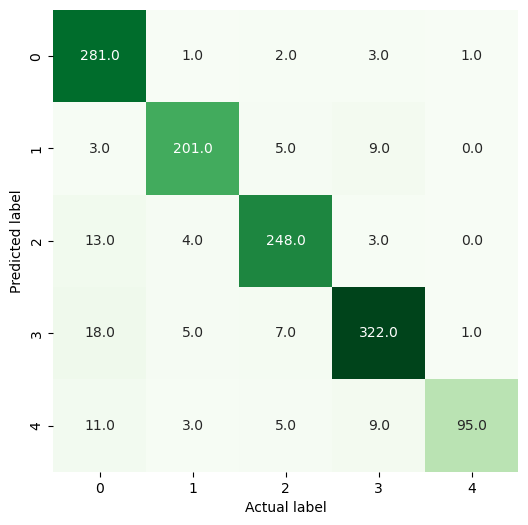

In [66]:
# Visualize Confusion Matrix with heatmap
fig, ax = plt.subplots(figsize=(6, 6))
ax = sns.heatmap(confusion_matrix(y_test, y_prediction),
                 annot=True,
                 cbar=False,
                 cmap="Greens", fmt = '0.1f')
plt.xlabel("Actual label")
plt.ylabel("Predicted label")
plt.show()

In [67]:
Targeted_words = ["Bank account services", "Credit card / Prepaid card", "Theft/Dispute reporting", "Mortgages/loans","Others"]

In [68]:
# Printing Classification Report
print(classification_report(y_test, y_prediction, target_names = Targeted_words))

                            precision    recall  f1-score   support

     Bank account services       0.86      0.98      0.92       288
Credit card / Prepaid card       0.94      0.92      0.93       218
   Theft/Dispute reporting       0.93      0.93      0.93       268
           Mortgages/loans       0.93      0.91      0.92       353
                    Others       0.98      0.77      0.86       123

                  accuracy                           0.92      1250
                 macro avg       0.93      0.90      0.91      1250
              weighted avg       0.92      0.92      0.92      1250



# Conclusion/Inference

Based on the algorithm, I got accuracy of the model is close to 92% with Precision and Recall as 93% and 90% respectively.